# Costi Riscossione Tributi

Questa analisi ha come obiettivo approfondire come i costi per **la riscossione dei tributi** si distribuisce in Italia. In particolare:
- Analizzeremo la sua distribuzione normalizzata per il numero di contribuenti per le varie Regioni.
- Cercheremo di capire quali sono le top/last regioni/province/comuni per spesa riscossione tributi

In [28]:
import numpy as np
import pandas as pd

# set the max number of columns to display
pd.options.display.max_columns = 98

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

import plotly.offline as py
import plotly.plotly as py_on
import plotly.graph_objs as go
from plotly import tools
py.init_notebook_mode(connected=True)

Il dataset preso in analisi contiene informazioni sui costi riscossione tributi per 2010-2013 e i redditi dei contribuenti per lo stesso periodo. In totale abbiamo 26800 osservazioni distribuite per anno:

In [13]:
fattore = 'SPESA_CCC_FC01A'
fattore_descrizione = 'Costo Riscossione Tributi'

tot_contribuenti = 'tot_contribuenti'

fattore_normalizzato = 'spesa_tributi_per_contribuenti'

In [5]:
df = pd.read_csv('./data/opencivitas_spesa_storica_dati_irpef.csv')
df.shape

(26799, 88)

Distribuzione delle osservazioni

In [8]:
df.groupby(['ANNO'])[fattore].count()

ANNO
2010    6702
2011    6699
2012    6699
2013    6699
Name: SPESA_CCC_FC01A, dtype: int64

Aggiungiamo ora la colonna per il fattore di analisi normalizzato per numero di contribuenti

In [14]:
df[fattore_normalizzato]= df[fattore] / df[tot_contribuenti]

In [15]:
df[fattore_normalizzato].head()

0     9.135789
1     0.233289
2    20.696801
3     6.788800
4    38.156980
Name: spesa_tributi_per_contribuenti, dtype: float64

## Costo Riscossione Tributi per Regione

Per prima cosa analizziamo quali sono le regioni che hanno maggiori costi per la riscossione delle tasse

In [74]:
df_regione = df.groupby(df.Regione)[fattore_normalizzato].mean()
df_regione = df_regione.sort_values(ascending=False)

In [85]:
data_pie = [
    go.Pie(labels = df_regione.index, values=df_regione),
]

layout_pie = go.Layout(
    title='Costo medio riscossione tasse per Regione/Contribuente in Euro'
)

fig_pie = go.Figure(data=data_pie, layout=layout_pie)

data_bar = [
    go.Bar(x=df_regione.index, y=df_regione, name = 'spesa media')
]

layout_bar = go.Layout(
    title='Costo medio riscossione tasse per Regione/Contribuente in Euro',
    xaxis=dict(
        title='Regioni',
    ),
    yaxis=dict(
        title='Euro per Contribuente',
    )
)

fig_bar = go.Figure(data=data_bar, layout=layout_bar)

py.iplot(fig_pie)
py.iplot(fig_bar)

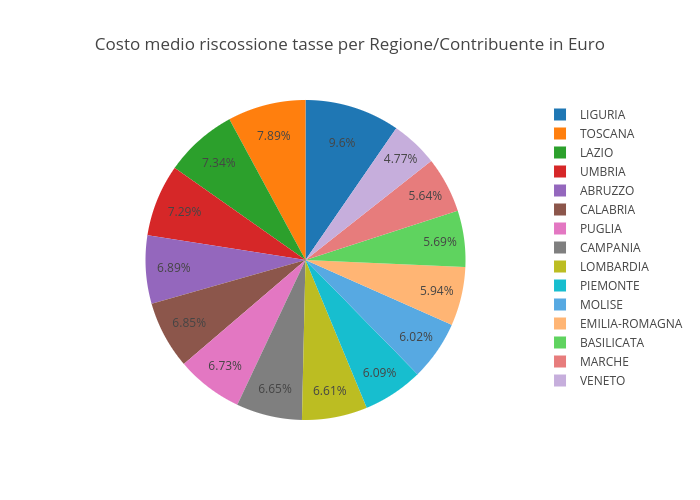

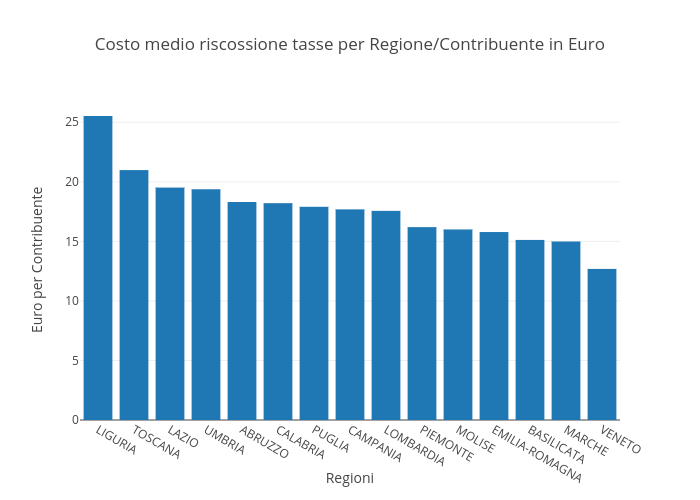

In [86]:
fig_pie_path = 'imgs/tributi_regione_pie.png'
fig_bar_path = 'imgs/tributi_regione_bar.png'

py_on.image.save_as(fig_pie, filename=fig_pie_path)
py_on.image.save_as(fig_bar, filename=fig_bar_path)
from IPython.display import Image
from IPython.display import display
x = Image(fig_pie_path)
y = Image(fig_bar_path)
display(x,y)